# IMSRacing dataset: Getting started

In [9]:
%load_ext autoreload
%autoreload 2

# this is needed for jupyter notebooks and due to the bad Python implementation of async which does not allow nested loops (and notebooks already start a loop)
# this is likely ONLY useful in notebooks and similar environments
import nest_asyncio
nest_asyncio.apply()

from pathlib import Path
import logging
import os

import pandas as pd
import numpy as np
import lib_ims
import matplotlib
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Some setup

In [10]:
# Setup logger to work in jupyter notebooks and set log level to debug (just to make sure we see everything logged there)
logger: logging.Logger = lib_ims.get_ims_logger()
if not logger.hasHandlers():
    logger.addHandler(logging.StreamHandler())
    logger.setLevel(logging.DEBUG)
    logger.info("Configured logging :)")

# Adopt this to your needs
DATABASE_PATH = Path('./database')
if not DATABASE_PATH.exists():
    os.mkdir(DATABASE_PATH.absolute())
    logger.info(f"Created {DATABASE_PATH.absolute()}")

## Show available Datasets

In [11]:
for name, description, licensing in lib_ims.get_ims_versions():
    print(f"Name: {name}\nDescription: {description}\nlicensing info: {licensing}\n\n")

Name: ims_racing_1_paper
Description: Dataset as described in the IMSRacing Publication
licensing info: Attribution-ShareAlike 4.0 International. Please take note of the included licence.txt file


Name: ims_racing_1_paper_v2
Description: Extended and fixed version of the Dataset as described in the IMSRacing Publication (You likely want to work with this one!)
licensing info: Attribution-ShareAlike 4.0 International. Please take note of the included licence.txt




## Download a Dataset

In [12]:
!mkdir temp
lib_ims.download_db(version='ims_racing_1_paper_v2', target_path=DATABASE_PATH)     # change `None` for a custom path if needed

mkdir: temp: File exists


Will download the IMS dataset to `database` (Code: 32842903)
The dataset is under separate licensing: `Attribution-ShareAlike 4.0 International. Please take note of the included licence.txt` (Code: 3482930)
Currently Downloaded 5.00MB of 5626.80MB (0.09%) (Code: 4823474)
Currently Downloaded 10.00MB of 5626.80MB (0.18%) (Code: 4823474)
Currently Downloaded 15.00MB of 5626.80MB (0.27%) (Code: 4823474)
Currently Downloaded 20.00MB of 5626.80MB (0.35%) (Code: 4823474)


KeyboardInterrupt: 

## Read some data off of the DB

In [13]:
db = lib_ims.ImsDatabase(DATABASE_PATH)

In [14]:
print("Included player IDs", db.players)
print("Included tracks", db.tracks)
print("Included simulators", db.simulators)

Included player IDs {'CHIP260', 'DAKL171', 'INBW112', 'MAAK191', 'TOINFR270', 'FAMB312', 'PASZ200'}
Included tracks {'tmm_lausitzring', 'ks_nurburgring'}
Included simulators {'d-pod', '2-pod', 'h-pod'}


In [15]:
# Iterate over recordings
for file in db:
    print("# Players:\t", file.n_players)
    print("Start time:\t", file.start_time)
    print("Track:\t\t", file.track_id)
    print("")

# Players:	 1
Start time:	 2022-01-31 12:10:36.681889
Track:		 ks_nurburgring

# Players:	 10
Start time:	 2022-01-31 13:05:13.473306
Track:		 ks_nurburgring

# Players:	 1
Start time:	 2022-01-31 13:05:49.989659
Track:		 ks_nurburgring

# Players:	 1
Start time:	 2022-01-31 13:31:13.039692
Track:		 tmm_lausitzring

# Players:	 10
Start time:	 2022-01-31 13:42:27.654201
Track:		 tmm_lausitzring

# Players:	 10
Start time:	 2022-01-31 14:15:50.377991
Track:		 ks_nurburgring

# Players:	 1
Start time:	 2022-01-31 15:01:22.597088
Track:		 ks_nurburgring

# Players:	 1
Start time:	 2022-01-31 15:41:56.050700
Track:		 tmm_lausitzring

# Players:	 1
Start time:	 2022-01-31 16:02:08.904579
Track:		 ks_nurburgring

# Players:	 10
Start time:	 2022-01-31 16:03:56.366080
Track:		 ks_nurburgring

# Players:	 10
Start time:	 2022-01-31 16:57:44.828904
Track:		 ks_nurburgring

# Players:	 10
Start time:	 2022-01-31 17:27:08.003835
Track:		 tmm_lausitzring

# Players:	 1
Start time:	 2022-01-31 17:5

In [16]:
first_file = iter(db).__next__()
# print static data as is
first_file.static_data

{'startTime': '2022-01-31T12:10:36.681889',
 'endTime': '2022-01-31T12:57:43.988158',
 'numCars': 1,
 'playerId': 'TOINFR270',
 'simulator': '2-pod',
 'track': {'name': 'ks_nurburgring',
  'variation': 'layout_gp_b',
  'trackLength': 5067.3388671875},
 'carDetails': {'carModel': 'ks_porsche_911_gt3_rs',
  'hasDRS': 0,
  'hasERS': 0,
  'hasKERS': 0,
  'maxFuel': 64.0,
  'maxRpm': 9000},
 'extra_info': {'session_number_global': 1,
  'session_number_imsracing1': 1.0,
  'data_sets': 'imsracing1'}}

In [17]:
# print some telemetry data
df: pd.DataFrame = first_file.telemetry
df.head()

/var/folders/jr/798md38j1mx89bn20l53rdb00000gn/T/ipykernel_31323/3704864973.py:2: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  df: pd.DataFrame = first_file.telemetry


,log_time_ms,packetId_graphic,AC_STATUS,AC_SESSION_TYPE,currentTime,lastTime,bestTime,split,completedLaps,position,...,tyreContactHeading_RL_z,tyreContactHeading_RR_x,tyreContactHeading_RR_y,tyreContactHeading_RR_z,brakeBias,localVelocity_x,localVelocity_y,localVelocity_z,currentMaxRpm,swerve_deg
0,0,4455,2,0,0:17:790,-:--:---,-:--:---,,0,1,...,-0.999907,-0.000980,0.004487,-0.999989,0.54,0.000321,0.000366,0.000238,9000,-53.255259
1,0,4455,2,0,0:17:790,-:--:---,-:--:---,,0,1,...,-0.999907,-0.000980,0.004487,-0.999989,0.54,0.000321,0.000366,0.000238,9000,-53.255259
2,2,4457,2,0,0:17:796,-:--:---,-:--:---,,0,1,...,-0.999907,-0.000972,0.004487,-0.999989,0.54,0.000265,0.000279,0.000578,9000,-24.925330
3,4,4457,2,0,0:17:796,-:--:---,-:--:---,,0,1,...,-0.999907,-0.000982,0.004487,-0.999989,0.54,0.000210,0.000462,0.000247,9000,-40.780346
4,8,4459,2,0,0:17:805,-:--:---,-:--:---,,0,1,...,-0.999907,-0.000975,0.004487,-0.999989,0.54,0.000162,0.000308,0.000614,9000,-15.293386


In [18]:
# ... and some stats
print("# data points\t\t\t", len(df))
print("# laps\t\t\t\t\t", len(df['completedLaps'].unique()))
print("Average lap time (s)\t", np.mean(list(set(df['iLastTime'].unique()) - {0})) / 1000)

# data points			 181926
# laps					 22
Average lap time (s)	 134.4537619047619


In [19]:
# ... plot a track
first_track = df[df['completedLaps'] == 0][['carCoordinates_00_x', 'carCoordinates_00_y', 'carCoordinates_00_z', 'speedKmh', 'gear']]

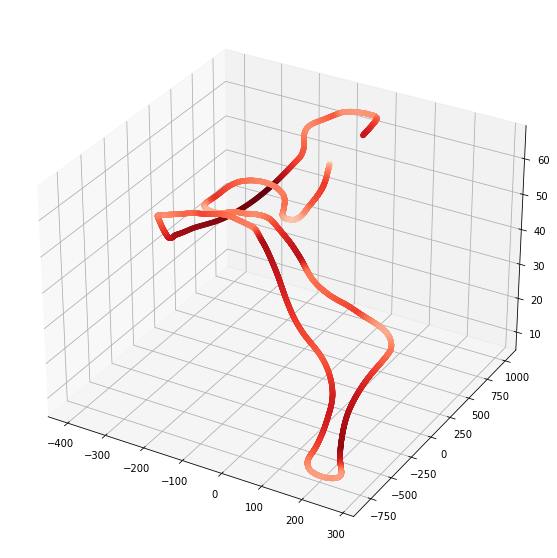

In [20]:
# plot one track and color it by speed
# note that the first track usually is not fully connected due to the driver starting from the box lane
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
_ = ax.scatter(first_track['carCoordinates_00_x'], first_track['carCoordinates_00_z'], first_track['carCoordinates_00_y'], c=first_track['speedKmh'] / max(first_track['speedKmh']), cmap=matplotlib.cm.get_cmap('Reds'))

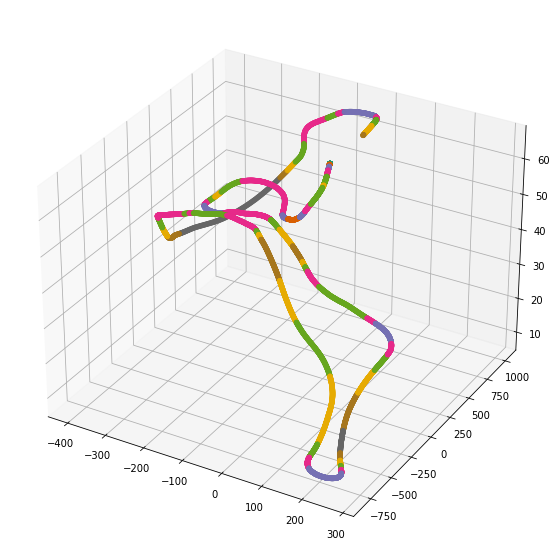

In [21]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
_ = ax.scatter(first_track['carCoordinates_00_x'], first_track['carCoordinates_00_z'], first_track['carCoordinates_00_y'], c=first_track['speedKmh'] / max(first_track['gear']), cmap=matplotlib.cm.get_cmap('Dark2'))